# The emh Rpackage

The emh package allows you to test the effeciency of any univariate zoo time series object in R.

The package achieves this using the following methodology,

* Downsample the data into a number of subfrequencies
* Run a suite of statistical tests of randomness on each subfrequency
* Aggregate the results (p values, Z scores, etc.) in a data.frame and return it

In addition to randomness tests emh also includes a number of stochastic process models.

## Installing the package

The first step to using the package is to download it and install it using the devtools R package

In [1]:
library(devtools)
suppressMessages(install_github(repo="stuartgordonreid/emh", 
                                force = TRUE))

Now check that you can load the package,

In [2]:
suppressMessages(library(emh))

## Getting datasets

The emh package includes a few functions which allow you to download a bunch of global stock market indices from Quandl.com right off the bat. You can, of course, also pass in your own data. I recommend sticking with zoo objects when using emh because of how the downsampling works.

In [3]:
# This may take some time. Use the S3, $ operator to see the datasets.
global_indices <- emh::data_quandl_downloader(data_quandl_indices())

[1] "DOWNLOADING DATASETS ..."
  |======================================================================| 100%

## Generating results

Generating a data.frame with the results from each of the randomness tests is as easy as passing a zoo object into the is_random function in emh. This function will downsample the data into multiple lower frequencies and run a battery of tests on each subfrequency. 

Frequencies are specified by the freqs1 and freqs2 arguments,

* freqs1 - this specifies the _lags_ to use when computing returns
* freqs2 - this specifies time-aware lags. Options are: c("Mon", "Tue", "Wed", "Thu", "Fri", "Week", "Month")

In [4]:
results <- is_random(S = global_indices$'YAHOO/INDEX_SML',
                     a = 0.99, # To get a 99% confident result
                     freqs1 = c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10),
                     freqs2 = c("Mon", "Tue", "Wed", "Thu", "Fri", "Week", "Month"))

  |======================================================================| 100%

## Viewing the results

You can now view the results (a data.frame object) or plot some interesting statistics

In [5]:
head(results, 30)

Test_Name,Frequency,Sample_Size,Statistic,Two_sided_p,Z_Score,Non_Random
Independent Runs,(t-1 to t),7031,3222.000000,0.000000,-6.401018,TRUE
Durbin-Watson,(t-1 to t),7031,2.000085,0.997102,2.759057,TRUE
Ljung-Box,(t-1 to t),7031,40.018562,0.000451,-3.319694,TRUE
Breusch-Godfrey,(t-1 to t),7031,1.493007,0.221750,-0.766295,FALSE
Bartell Rank,(t-1 to t),7031,-4.581588,0.000005,-4.434487,TRUE
Variance-Ratio LoMac,(t-1 to t),7031,0.524304,0.612558,0.285993,FALSE
Independent Runs,(t-2 to t),3515,1615.000000,0.000025,-4.056609,TRUE
Durbin-Watson,(t-2 to t),3515,1.999914,0.997877,2.859250,TRUE
Ljung-Box,(t-2 to t),3515,35.686137,0.001962,-2.884263,TRUE
Breusch-Godfrey,(t-2 to t),3515,0.002772,0.958014,1.728094,FALSE


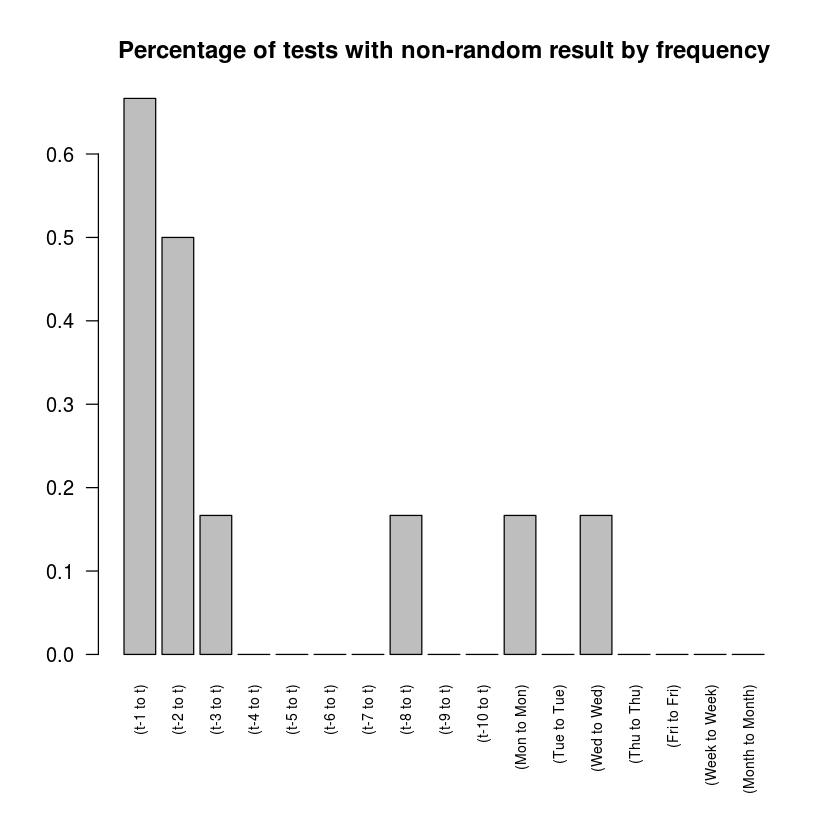

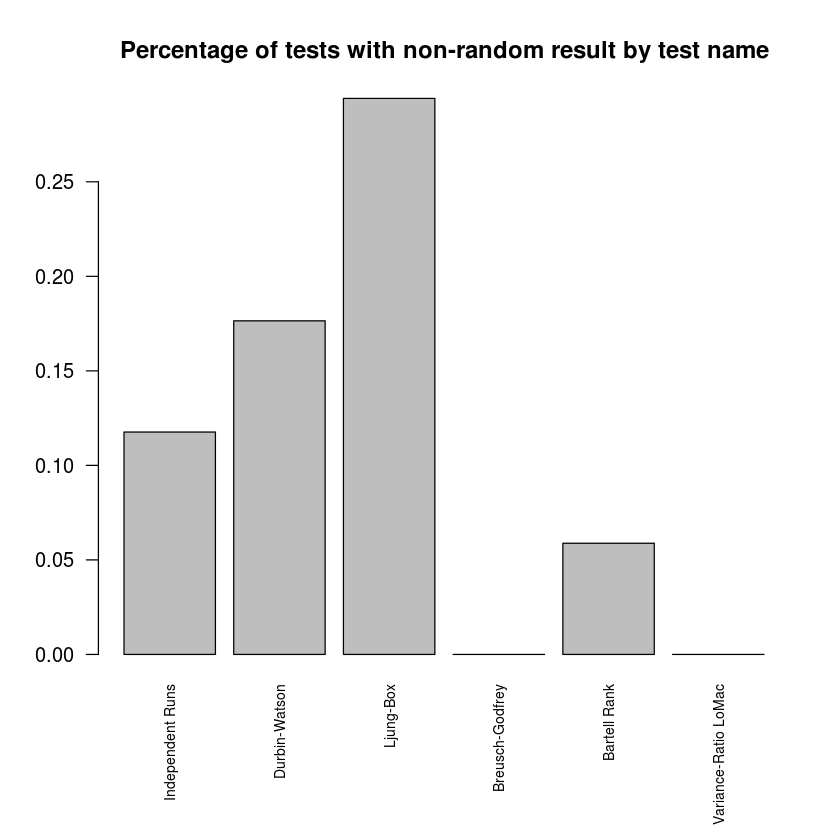

In [6]:
plot_results(results)

## Interpreting the results

In the two graphs above we can see that there are a large number of non-random results at the $t-1$ to $t$, and $t-2$ to $t$ frequencies. 

This might imply that the selected market, the small cap index of the S&P 500, is non-random at those frequencies. When we look at the second graph we see that most of the results were produced by the Ljung-Box and Durbin-Watson statistical tests which implies that there might exist some serial correlations in the data which are significantly different from zero. These tests do not tell us how _economically_ significant the serial correlations are nor does it tell us _where_ in the data these serial correlations were observed. These questions are best left to the entrepid quant trader to answer.